In [1]:
import ooipy
import datetime
from matplotlib import pyplot as plt

In [2]:
# takes 4 min to run
# yr, month, day, hour, min, s
start_time = datetime.datetime(2024,8,22,17,43,0)
end_time = datetime.datetime(2024,8,22,17,44,0)
node1 = 'LJ01D'
node2 = 'Eastern_Caldera'

# Download Broadband data
print('Downloading Broadband Data:')
hdata_broadband = ooipy.get_acoustic_data(start_time, end_time, node1, verbose=True)
print('')
print('Downloading Low Frequency Data:')
hdata_lowfreq = ooipy.get_acoustic_data_LF(start_time, end_time, node2, verbose=True, zero_mean=True)

Fetching URLs...
Sorting valid URLs for Time Window...


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]


Merging Data...



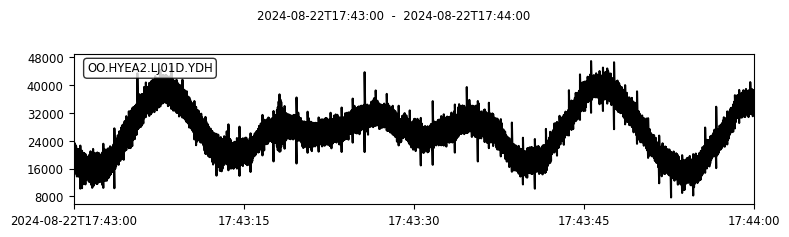

In [3]:
_ = hdata_broadband.plot()

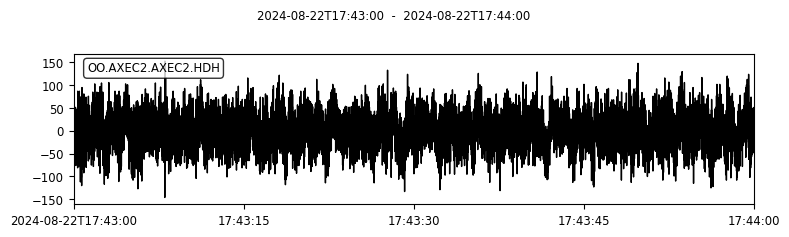

In [4]:
_ = hdata_lowfreq.plot()

In [5]:
spec1 = hdata_broadband.compute_spectrogram()
spec2 = hdata_lowfreq.compute_spectrogram(avg_time=1, L=128)

psd1 = hdata_broadband.compute_psd_welch()
psd2 = hdata_lowfreq.compute_psd_welch()

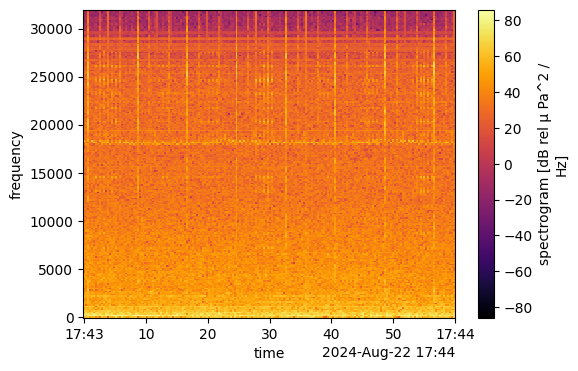

In [6]:
fig = plt.figure(figsize=(6,4))
_ = spec1[::10, ::10].plot(x='time', cmap='inferno')

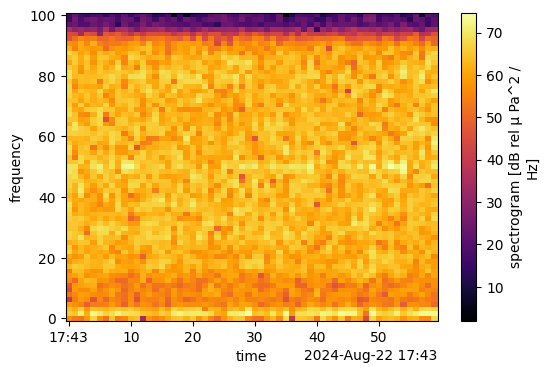

In [7]:
fig = plt.figure(figsize=(6,4))
_ = spec2.plot(x='time', cmap='inferno')

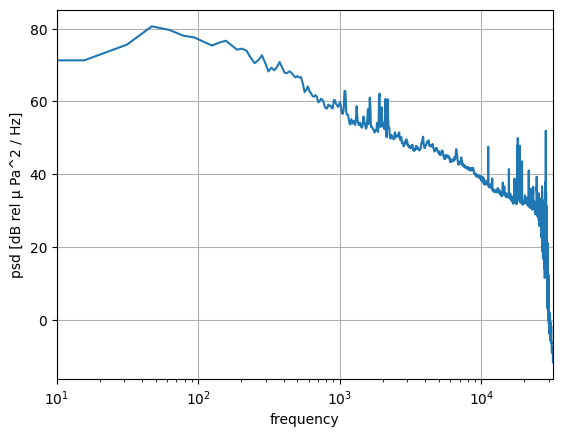

In [8]:
psd1.plot()    
plt.xlim([10,32000])
plt.grid()
plt.xscale('log')

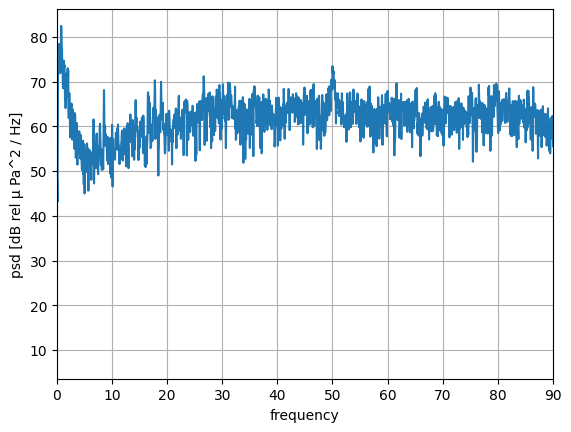

In [9]:
psd2.plot()    
plt.xlim([0,90])
plt.grid()

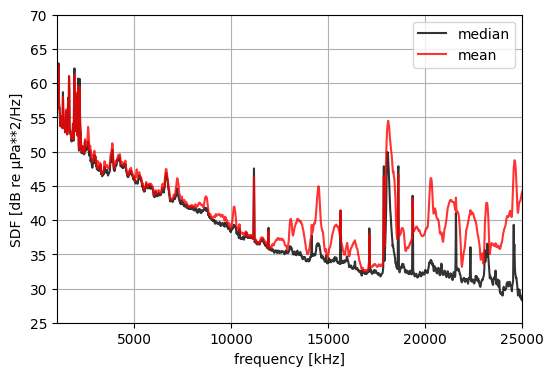

In [10]:
# power spectral density estimate of noise data using Welch's method
fig, ax = plt.subplots(figsize=(6,4))

# 1. using median averaging (default)
psd_med = hdata_broadband.compute_psd_welch()

# 2. using mean averaging
psd_mean = hdata_broadband.compute_psd_welch(avg_method='mean')

psd_med.plot(c='k', alpha=0.8, label='median')
psd_mean.plot(c='r', alpha=0.8, label='mean')


plt.xlabel('frequency [kHz]')
plt.ylabel('SDF [dB re µPa**2/Hz]')
plt.xlim(1000,25000)
plt.ylim(25,70)
plt.legend()
plt.grid()